<a href="https://colab.research.google.com/github/lloppy/neironki_5sem/blob/main/%D1%82%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [142]:
df = pd.read_csv('/content/Titanic.csv', index_col = 'PassengerId')

In [143]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


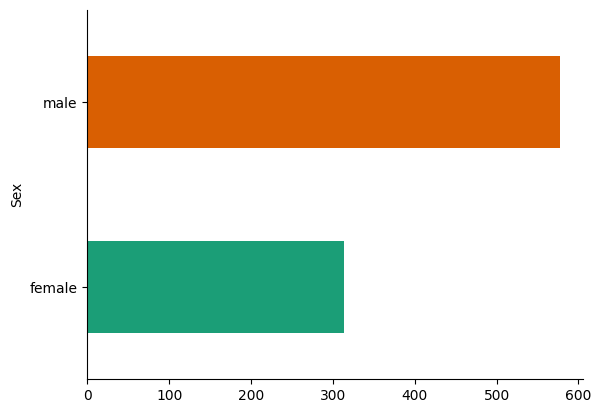

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

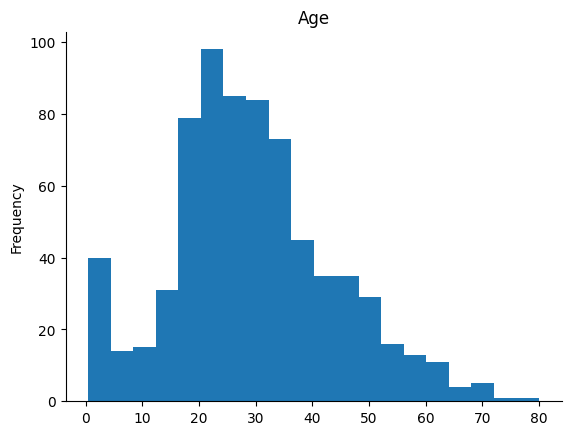

In [145]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [146]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


# Заполняем пропуски возраста. идем сложным путем. нужно найти зависимости с другими категориями, и по этим признакам заполнять возраст

задача:
1. найти зависимости, построив графики

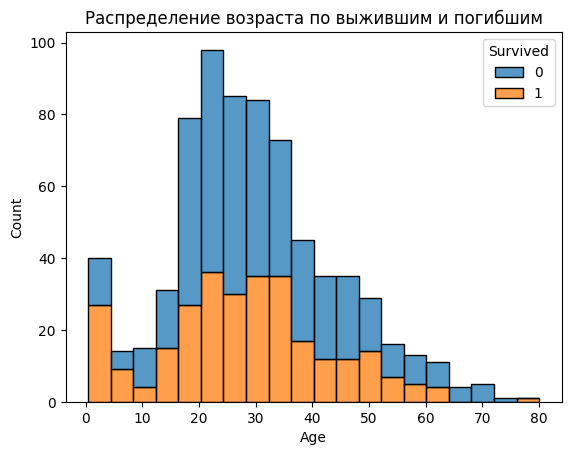

In [148]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Распределение возраста по выжившим и погибшим')
plt.show()

In [149]:
# Подсчет количества выживших и погибших
survival_counts = df['Survived'].value_counts(normalize=True) * 100
print(survival_counts)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


62 процента погибло, 38 процентов выжили

## посмотрим кто выживал чаще:

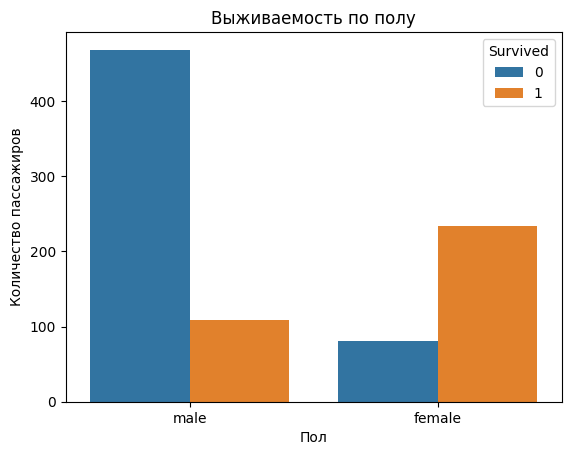

In [150]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выживаемость по полу')
plt.ylabel('Количество пассажиров')
plt.xlabel('Пол')
plt.show()

In [151]:
gender_survival = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
print(gender_survival)

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


### женщины выживали чаще, чем мужчины

посмотим теперь по возрастам, кто выживал чаще

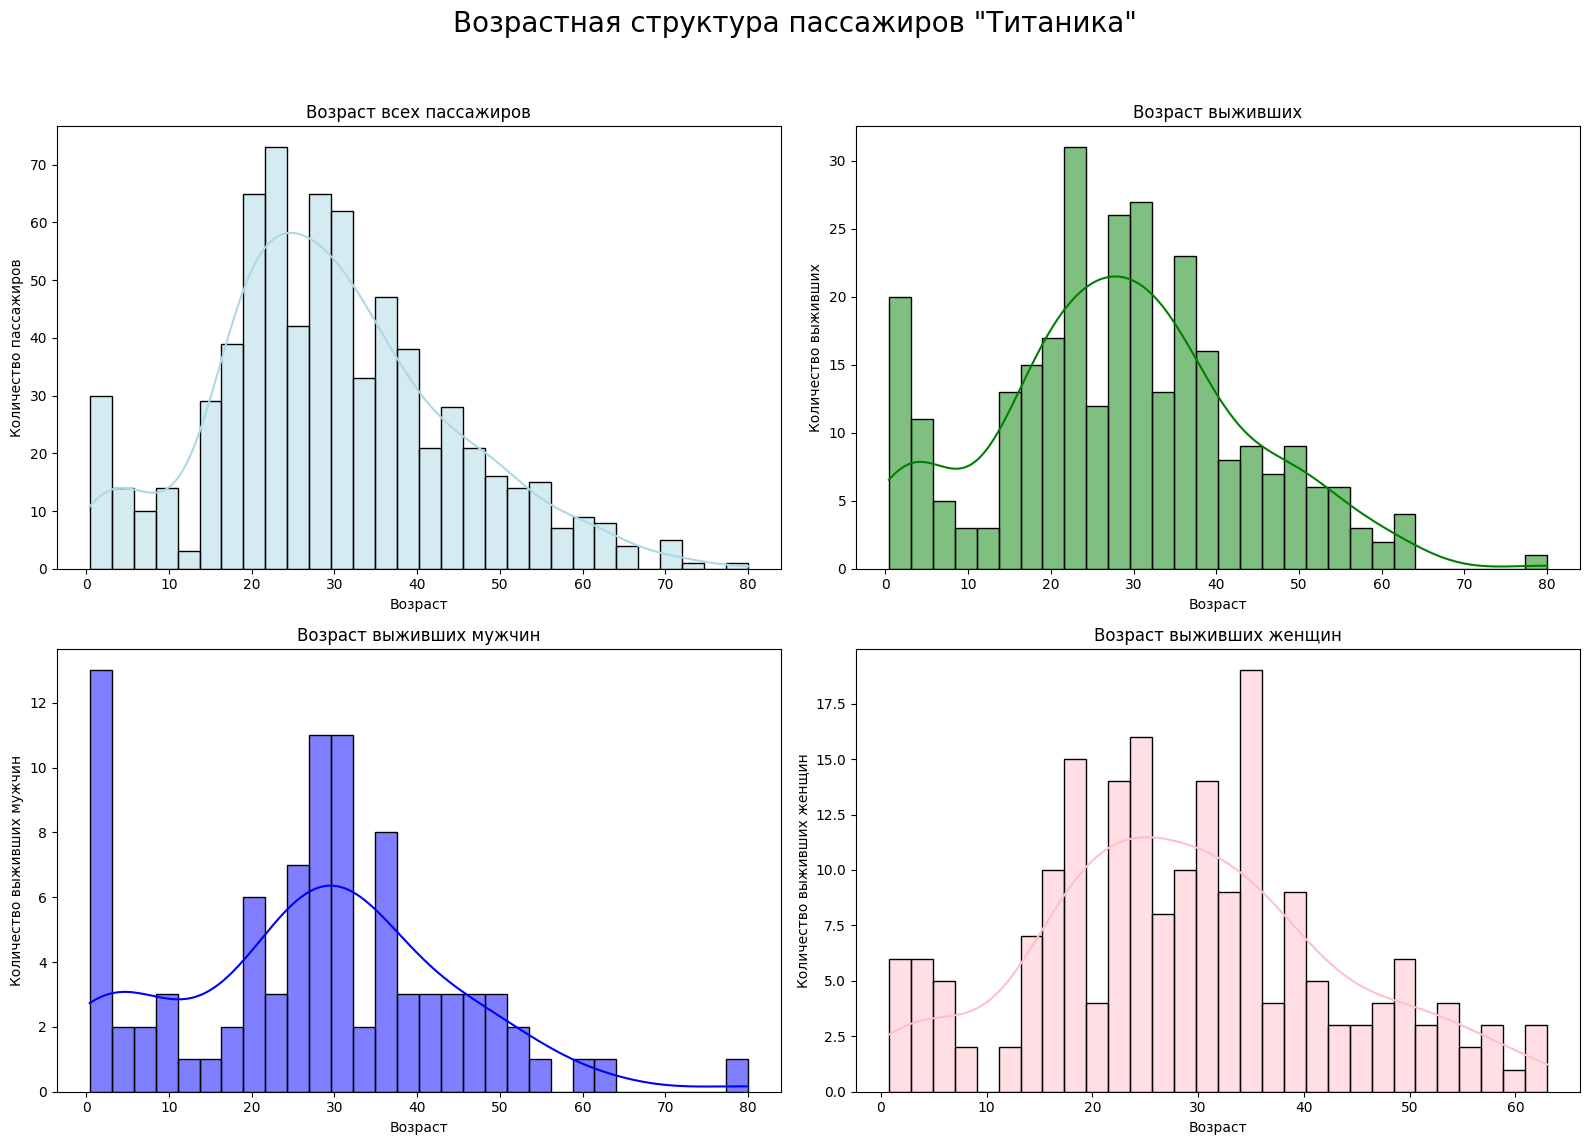

In [152]:
plt.figure(figsize=(16, 12))

# 1. График возраста всех пассажиров
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших
plt.subplot(2, 2, 2)
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мужчин
plt.subplot(2, 2, 3)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мужчин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мужчин')

# 4. График возраста выживших женщин
plt.subplot(2, 2, 4)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших женщин')

# Настройка общего заголовка и отображение графиков
plt.suptitle('Возрастная структура пассажиров "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### по графикам видно, что больше людей было возрастом 20-35 лет. также люди с этим же возрастом выживали чаще

### также можно заметить на графике мужчин, что мальчики около нуля лет выживали чаще

In [153]:
children = df.loc[(df['Age'] < 18) & (df['Age'] > 0)]

# Фильтрация данных для выживших детей
survivors_children = children[children['Survived'] == 1]

# Вычисление процента выживших детей
percentage_survivors = round(len(survivors_children) * 100 / len(children), 2)

print(f'Пассажиров до 18 лет спаслось {percentage_survivors}%')

Пассажиров до 18 лет спаслось 53.98%


In [154]:
adults = df.loc[df['Age'] >= 18]

# Фильтрация данных для выживших взрослых
survivors_adults = adults[adults['Survived'] == 1]

# Вычисление процента выживших взрослых
percentage_survivors_adults = round(len(survivors_adults) * 100 / len(adults), 2)

print(f'Пассажиров 18 лет и старше спаслось {percentage_survivors_adults}%')

Пассажиров 18 лет и старше спаслось 38.1%


### дети выживали чаще, чем взрослые (54 процента против 38 соответственно)

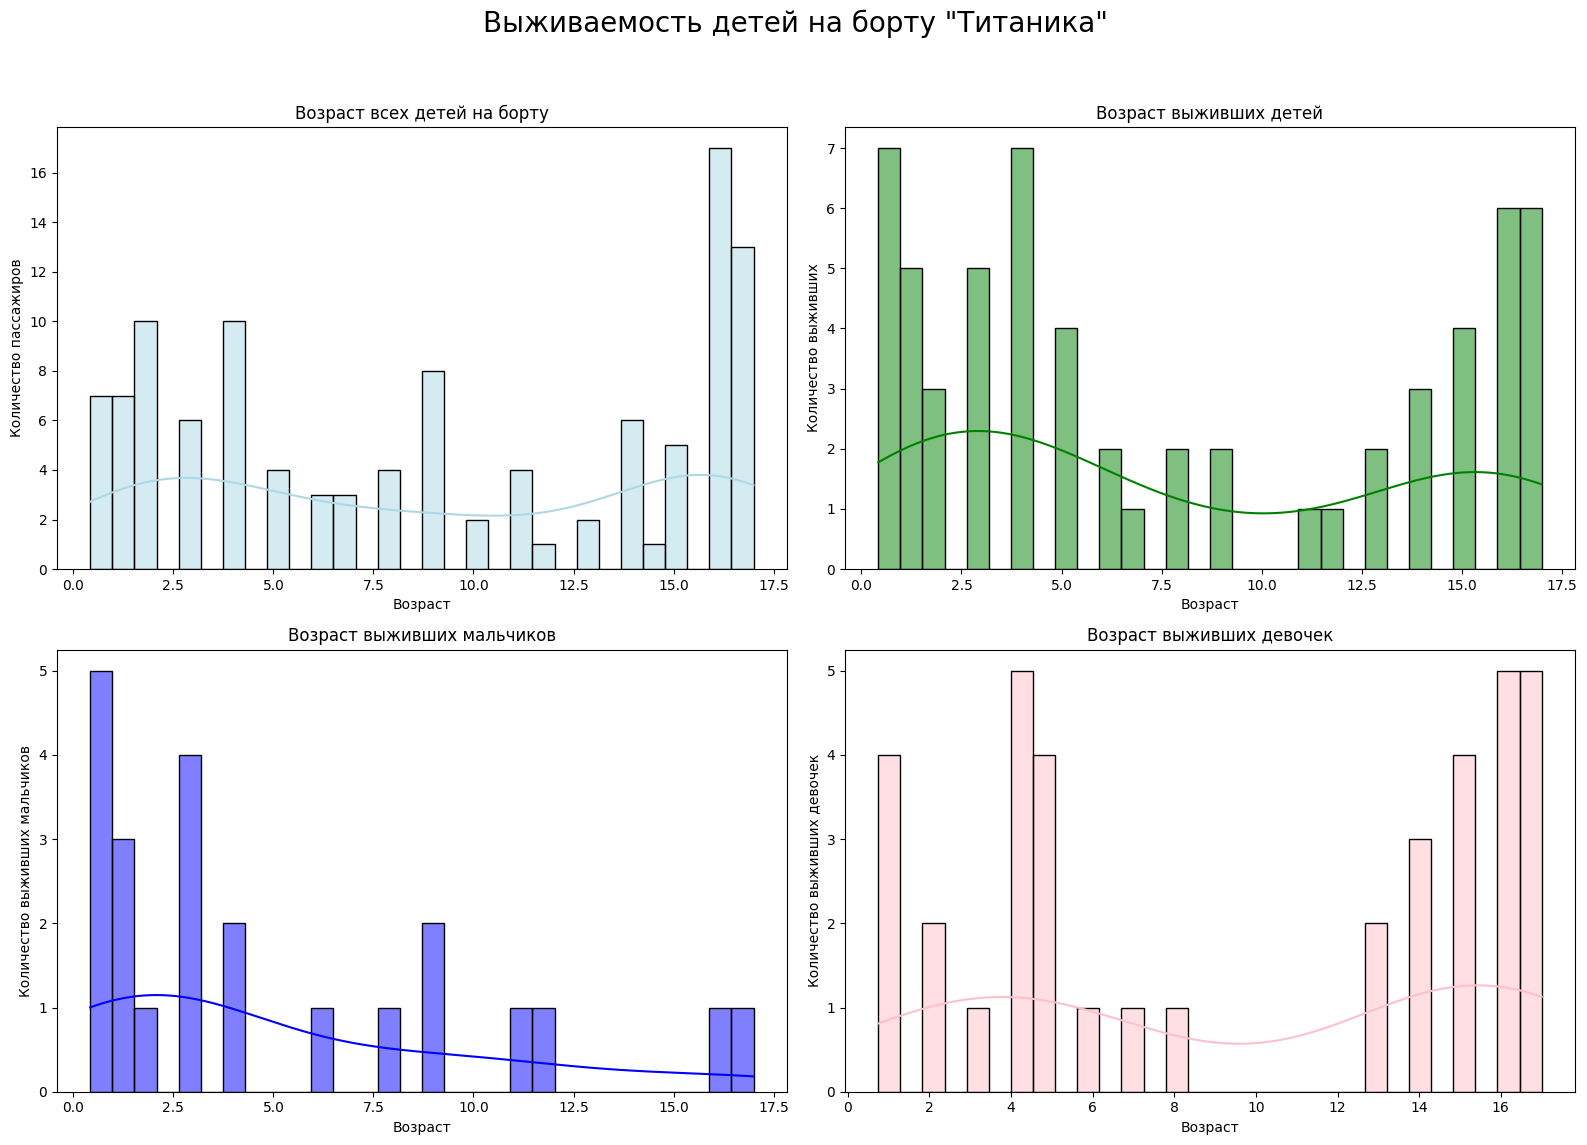

In [155]:
# Фильтрация данных для детей (до 18 лет)
children = df.loc[(df['Age'] < 18) & (df['Age'] > 0)]

# Настройка размера фигуры
plt.figure(figsize=(16, 12))

# 1. График возраста всех детей
plt.subplot(2, 2, 1)
sns.histplot(children['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех детей на борту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших детей
survivors_children = children[children['Survived'] == 1]
plt.subplot(2, 2, 2)
sns.histplot(survivors_children['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших детей')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мальчиков
survivors_boys = survivors_children[survivors_children['Sex'] == 'male']
plt.subplot(2, 2, 3)
sns.histplot(survivors_boys['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мальчиков')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мальчиков')

# 4. График возраста выживших девочек
survivors_girls = survivors_children[survivors_children['Sex'] == 'female']
plt.subplot(2, 2, 4)
sns.histplot(survivors_girls['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших девочек')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших девочек')

# Настройка общего заголовка и отображение графиков
plt.suptitle('Выживаемость детей на борту "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### в графиках детей (от 0 до 18 лет) мы можем наблюдать просадку по выживаемости в районе от 8 до 12 лет. у мальчиков эта просадка увеличивается вплоть до 18 лет, в то же время выживаемость у девочек этого возраста увеличивается.

In [156]:
def age_gender_category(row):
    age = row['Age']
    sex = row['Sex']
    if age < 12:
        return f'Дети ({sex.capitalize()})'
    elif 12 <= age < 60:
        return f'Взрослые ({sex.capitalize()})'
    else:
        return f'Пожилые ({sex.capitalize()})'

df['AgeGenderGroup'] = df.apply(age_gender_category, axis=1)

age_gender_survival = df.groupby('AgeGenderGroup')['Survived'].value_counts(normalize=True).unstack() * 100
print(age_gender_survival)

Survived                   0          1
AgeGenderGroup                         
Взрослые (Female)  22.666667  77.333333
Взрослые (Male)    82.278481  17.721519
Дети (Female)      40.625000  59.375000
Дети (Male)        44.444444  55.555556
Пожилые (Female)   29.824561  70.175439
Пожилые (Male)     86.986301  13.013699


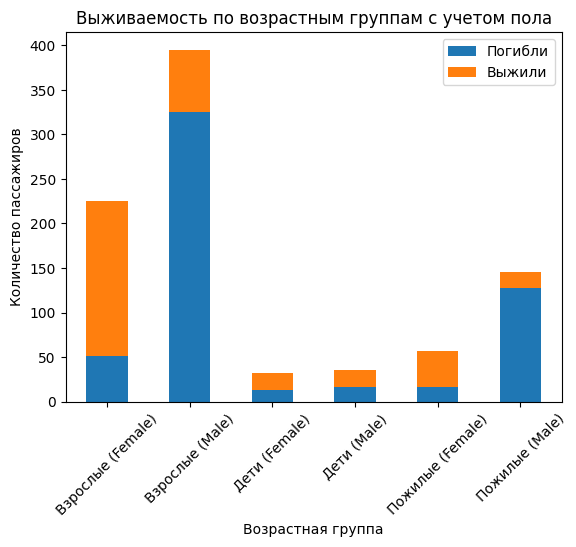

In [157]:
age_gender_survival = df.groupby(['AgeGenderGroup', 'Survived']).size().unstack().fillna(0)

# Построение графика
age_gender_survival.plot(kind='bar', stacked=True)
plt.title('Выживаемость по возрастным группам с учетом пола')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.xticks(rotation=45)
plt.legend(['Погибли', 'Выжили'])
plt.show()

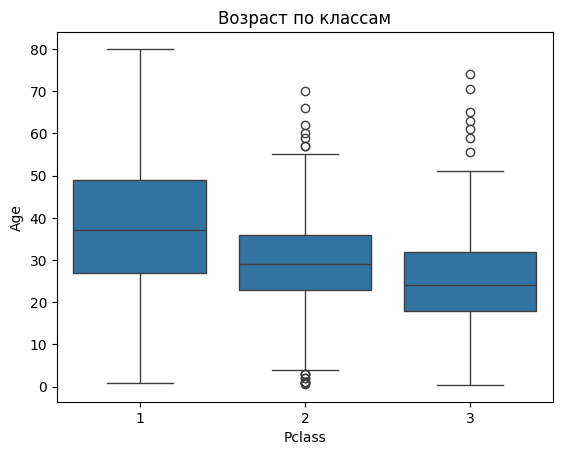

In [158]:
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Возраст по классам')
plt.show()

In [159]:
import re

# Функция для извлечения титула из имени
def extract_title(name):
    title_search = re.search(r',\s*([^\.]+)\.', name)
    if title_search:
        return title_search.group(1).strip()
    return None

df['Title'] = df['Name'].apply(extract_title)

print(df[['Name', 'Title']].head())

                                                          Name Title
PassengerId                                                         
1                                      Braund, Mr. Owen Harris    Mr
2            Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
3                                       Heikkinen, Miss. Laina  Miss
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
5                                     Allen, Mr. William Henry    Mr


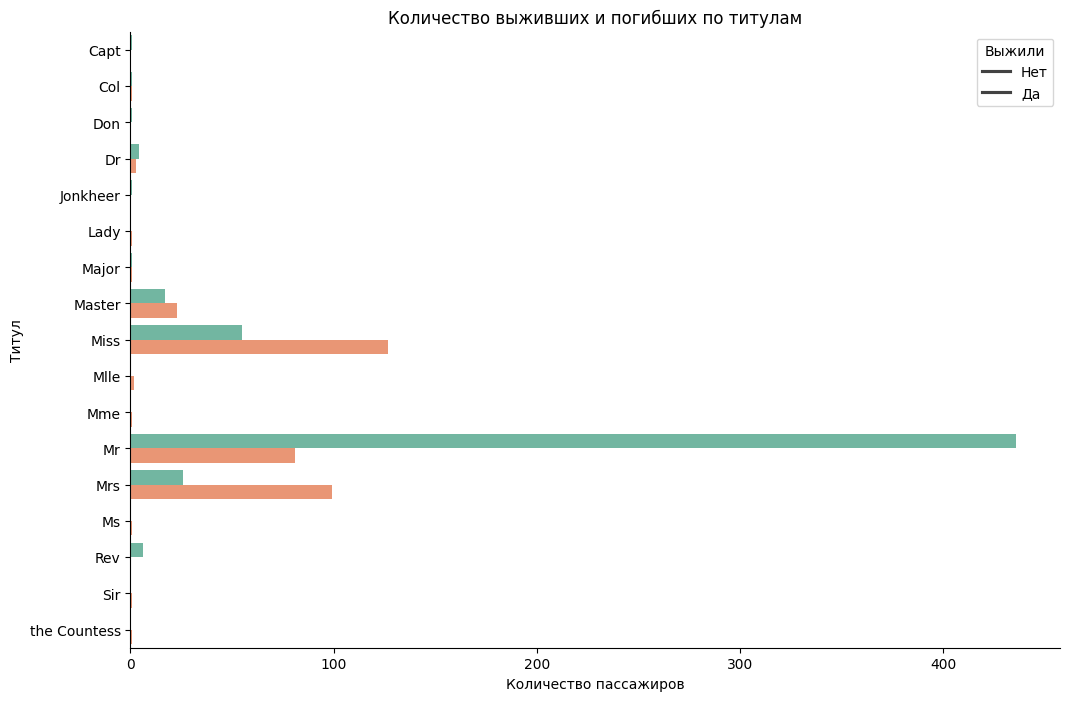

In [160]:
# Группировка данных по титулу и статусу выживания
title_survival_counts = df.groupby(['Title', 'Survived']).size().reset_index(name='Count')

# Настройка графика
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы
sns.barplot(data=title_survival_counts, x='Count', y='Title', hue='Survived', palette='Set2')

# Настройка заголовка и меток
plt.title('Количество выживших и погибших по титулам')
plt.xlabel('Количество пассажиров')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Выжили', labels=['Нет', 'Да'])
plt.show()

<ipython-input-161-ca93c1d6b118>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=title_summary, x='Survival Rate (%)', y='Title', palette='Set2')


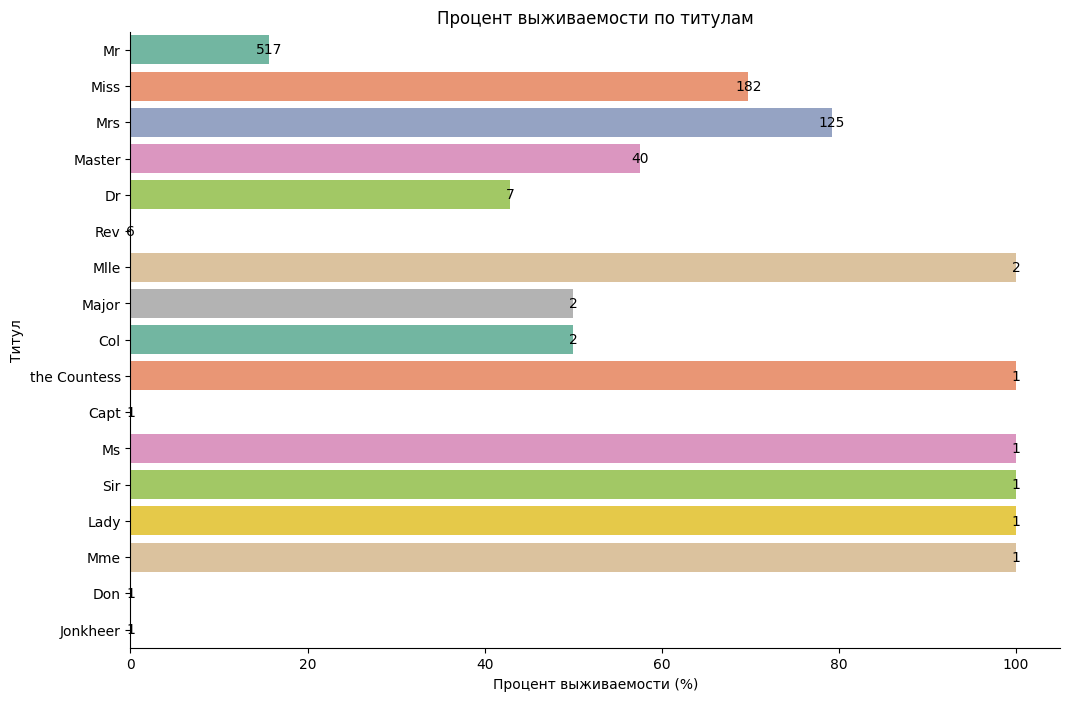

           Title  Count  Survival Rate (%)
0             Mr    517          15.667311
1           Miss    182          69.780220
2            Mrs    125          79.200000
3         Master     40          57.500000
4             Dr      7          42.857143
5            Rev      6           0.000000
6           Mlle      2         100.000000
7          Major      2          50.000000
8            Col      2          50.000000
9   the Countess      1         100.000000
10          Capt      1           0.000000
11            Ms      1         100.000000
12           Sir      1         100.000000
13          Lady      1         100.000000
14           Mme      1         100.000000
15           Don      1           0.000000
16      Jonkheer      1           0.000000


In [161]:
title_counts = df['Title'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']

# Группировка данных по титулу и статусу выживания
title_survival_counts = df.groupby(['Title', 'Survived']).size().unstack(fill_value=0)

# Расчет процента выживших
title_survival_counts['Survival Rate (%)'] = (title_survival_counts[1] / title_survival_counts.sum(axis=1)) * 100

# Объединение данных о количестве пассажиров с процентами выживаемости
title_summary = title_counts.merge(title_survival_counts[['Survival Rate (%)']], on='Title')

# Настройка графика
plt.figure(figsize=(12, 8))

# Построение столбчатой диаграммы
sns.barplot(data=title_summary, x='Survival Rate (%)', y='Title', palette='Set2')

# Добавление текста с количеством пассажиров на график внутри столбиков
for index, row in title_summary.iterrows():
    plt.text(row['Survival Rate (%)'], index, f"{row['Count']}", color='black', ha="center", va="center")

# Настройка заголовка и меток
plt.title('Процент выживаемости по титулам')
plt.xlabel('Процент выживаемости (%)')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# Вывод количества пассажиров по титулам в текстовом формате
print(title_summary)

In [162]:
captains = df[df['Title'].str.contains('Capt', case=False, na=False)]

num_captains = len(captains)
print(f'Количество капитанов на "Титанике": {num_captains}')

print(captains[['Name', 'Age', 'Survived']])

Количество капитанов на "Титанике": 1
                                     Name   Age  Survived
PassengerId                                              
746          Crosby, Capt. Edward Gifford  70.0         0


In [163]:
titlul_Mlle = df[df['Title'].str.contains('Mlle', case=False, na=False)]

num_titlul_Mlle = len(titlul_Mlle)
print(f'Количество Mlle на "Титанике": {num_titlul_Mlle}')

print(titlul_Mlle[['Name', 'Age', 'Survived']])

Количество Mlle на "Титанике": 2
                                                         Name   Age  Survived
PassengerId                                                                  
642                                      Sagesser, Mlle. Emma  24.0         1
711          Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  24.0         1


In [164]:
titlul_sir = df[df['Title'].str.contains('Sir', case=False, na=False)]

num_titlul_sir = len(titlul_sir)
print(f'Количество Sir на "Титанике": {num_titlul_Mlle}')

print(titlul_sir[['Name', 'Age', 'Survived']])

Количество Sir на "Титанике": 2
                                                     Name   Age  Survived
PassengerId                                                              
600          Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")  49.0         1


### люди с женскими титулами(кроме Miss и Mrs), а также мужской титул Sir (один человек) выживали со 100 процентой вероятностью. потому что таких людей было мало на борту. поэтому этот параметр не репрезентативен


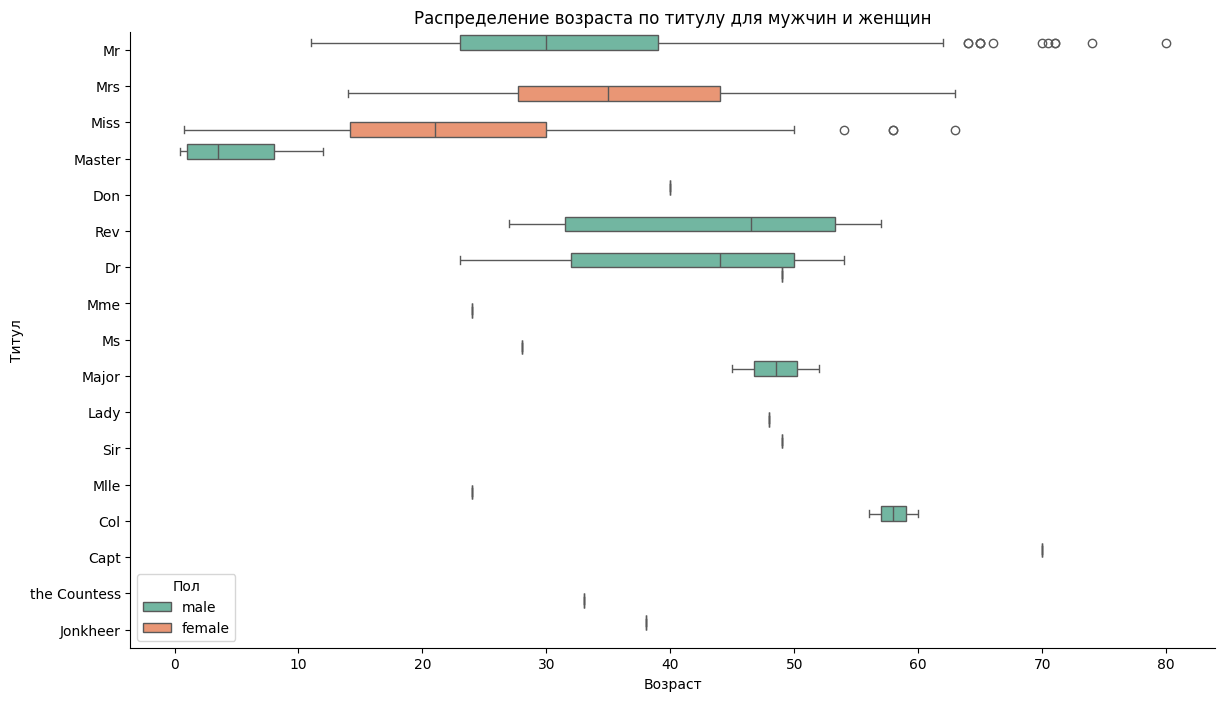

In [165]:
plt.figure(figsize=(14, 8))

# Построение графика распределения возраста по титулу с разделением на пол
sns.boxplot(data=df, x='Age', y='Title', hue='Sex', palette='Set2')

# Настройка заголовка и меток
plt.title('Распределение возраста по титулу для мужчин и женщин')
plt.xlabel('Возраст')
plt.ylabel('Титул')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Пол')
plt.show()

## отлично, мы нашли параметр Титул, по которому сможем приблизительно заполнить пропуски возраста

In [166]:
print(df[['Age']].isnull().sum())  # Проверка на наличие пустых значений

Age    177
dtype: int64


In [167]:
# 1. Группировка данных по титулу и вычисление среднего возраста
title_age_mean = df.groupby('Title')['Age'].mean().reset_index()

# 2. Заполнение пропусков в возрасте на основе среднего возраста по титулу
def fill_age_with_title_mean(row):
    if pd.isnull(row['Age']):
        # Найти средний возраст по титулу
        return title_age_mean.loc[title_age_mean['Title'] == row['Title'], 'Age'].values[0]
    return row['Age']

# Применение функции к DataFrame
df['Age'] = df.apply(fill_age_with_title_mean, axis=1)

print(df[['Age']].isnull().sum())  # Проверка на наличие пустых значений

Age    0
dtype: int64


мы заполнили пропуски возраста

## новый график

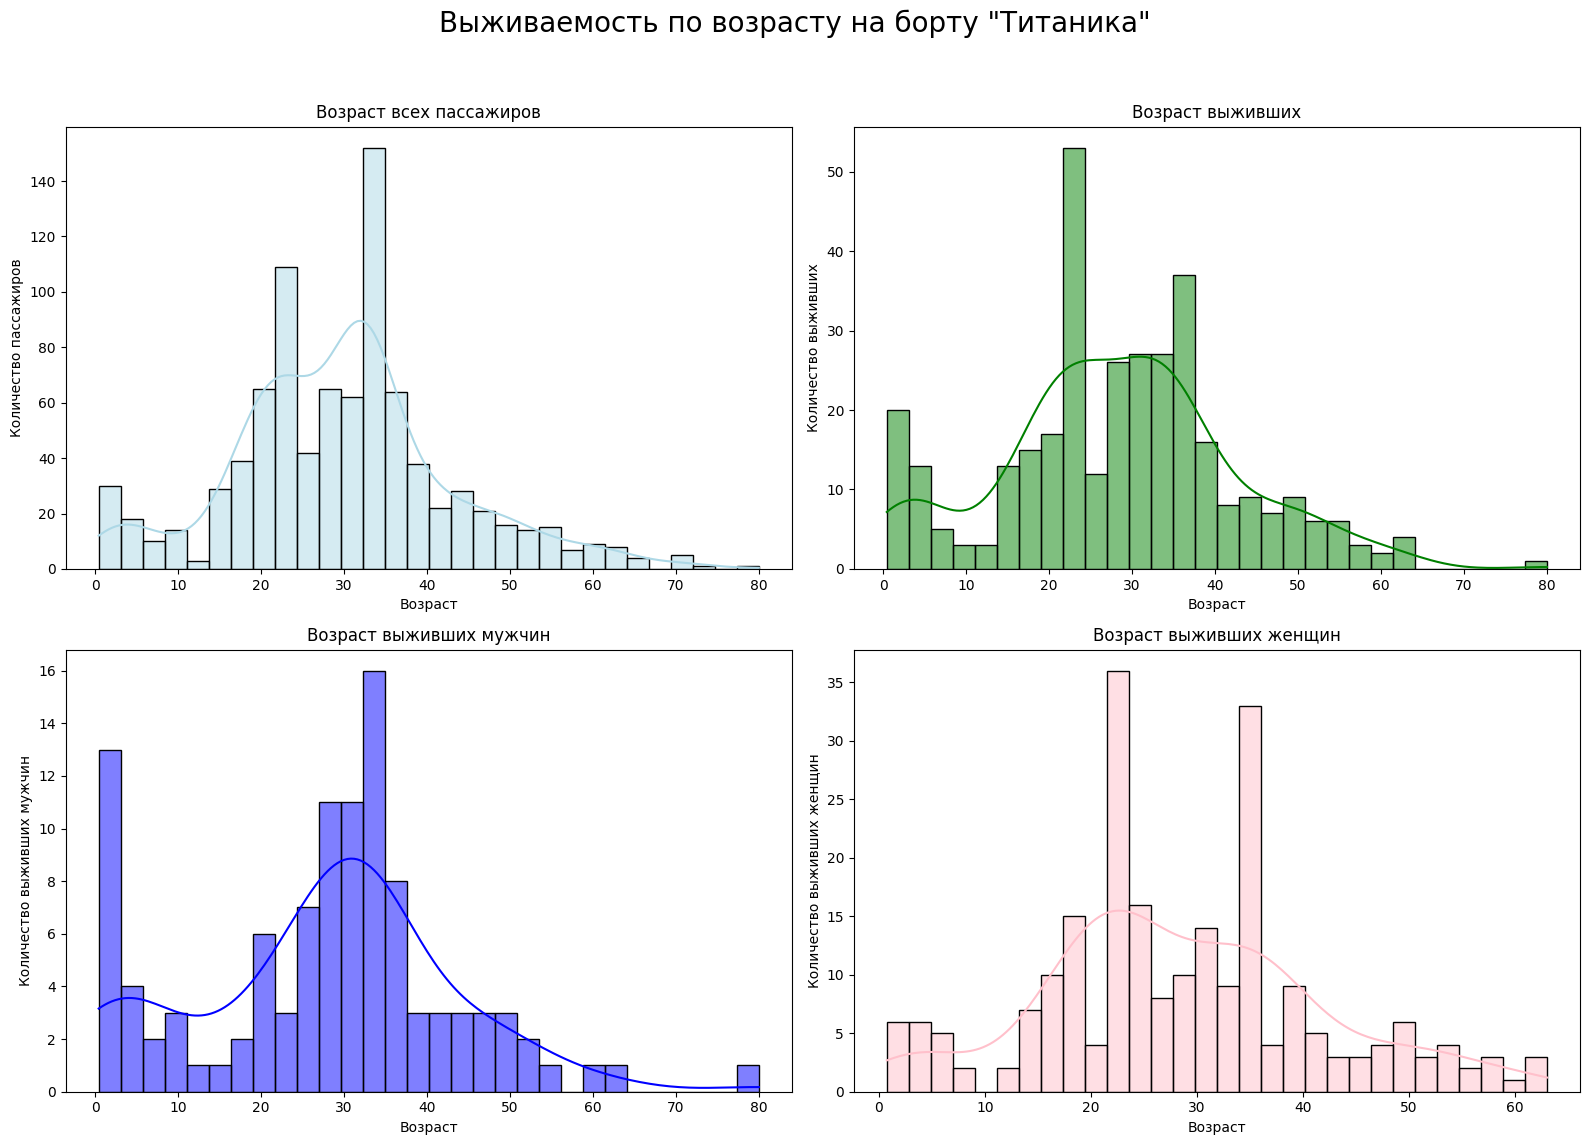

In [168]:
plt.figure(figsize=(16, 12))

# 1. График возраста всех пассажиров
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='lightblue')
plt.title('Возраст всех пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

# 2. График возраста выживших
plt.subplot(2, 2, 2)
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green')
plt.title('Возраст выживших')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')

# 3. График возраста выживших мужчин
plt.subplot(2, 2, 3)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], bins=30, kde=True, color='blue')
plt.title('Возраст выживших мужчин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших мужчин')

# 4. График возраста выживших женщин
plt.subplot(2, 2, 4)
sns.histplot(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], bins=30, kde=True, color='pink')
plt.title('Возраст выживших женщин')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших женщин')

# Настройка общего заголовка и отображение графиков
plt.suptitle('Выживаемость по возрасту на борту "Титаника"', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

для сравнения график до заполнения пропусков в возрасте:
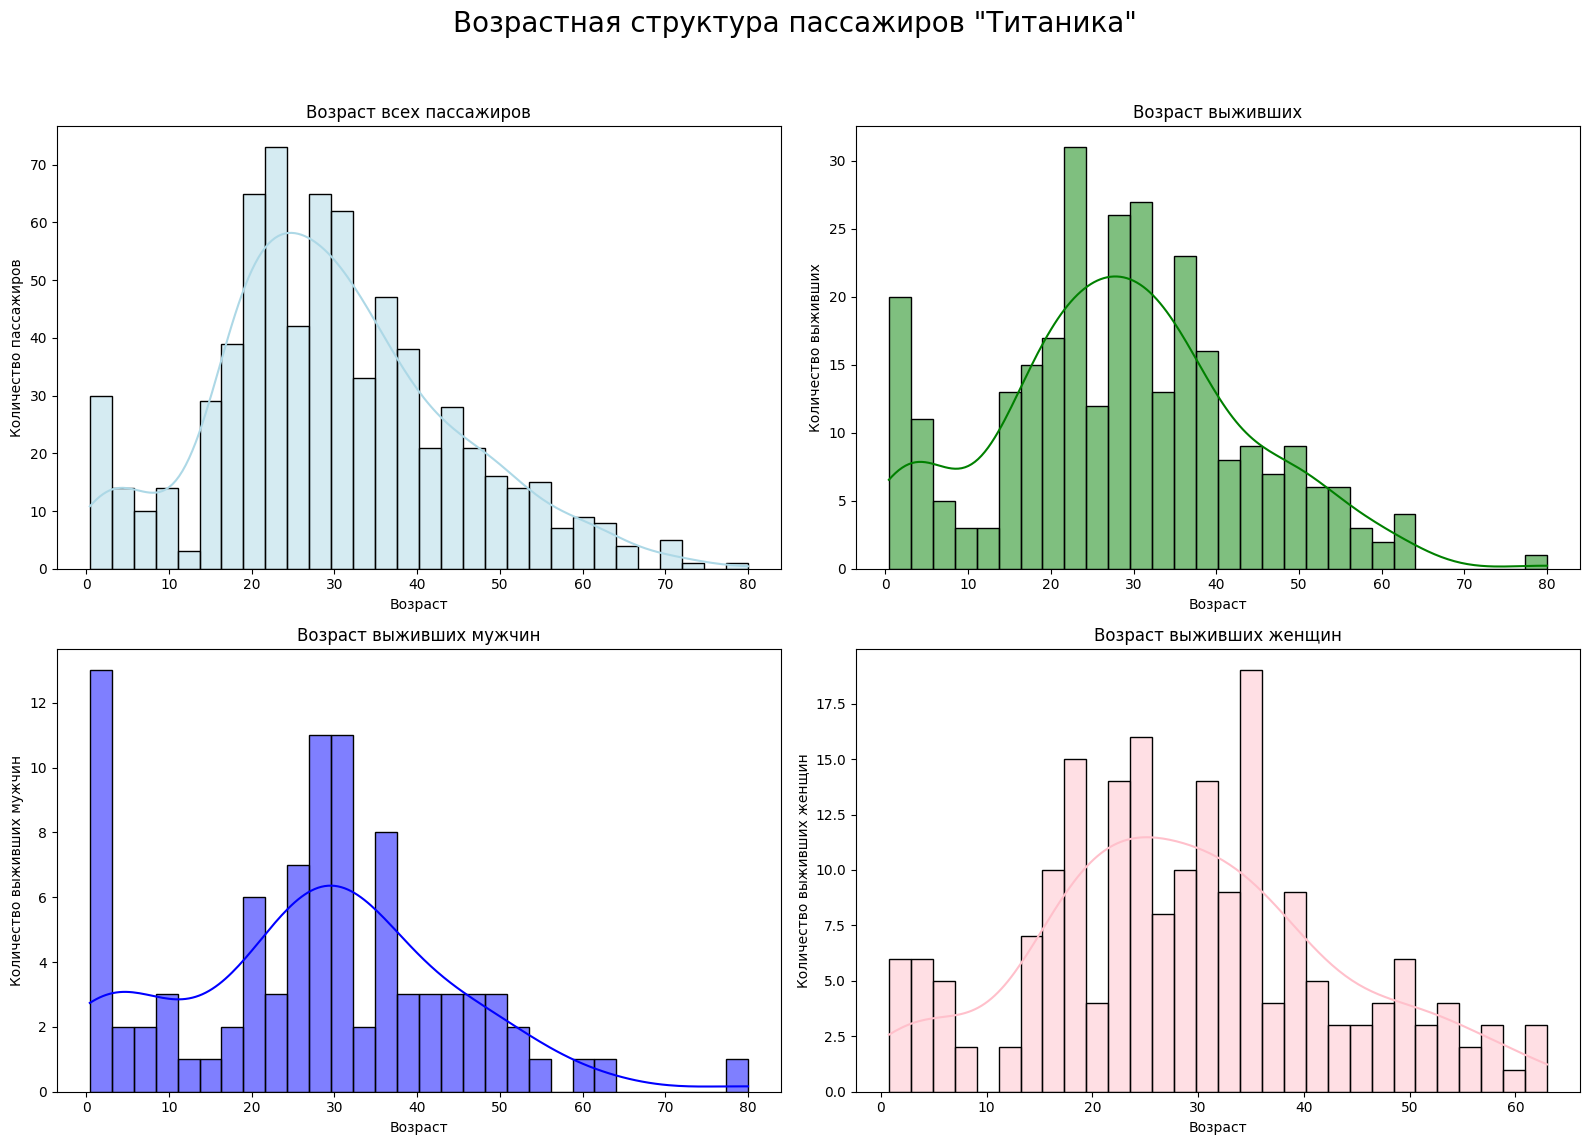

## видим, что увеличилось число возрастов от 18 до 40 лет